<a href="https://colab.research.google.com/github/Ftsnba/Data-Science/blob/master/Competi%C3%A7%C3%A3o_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Competição Kaggle - Disciplina Aprendizagem de Máquina**

###Professor: Cleber Zanchettin
### Desafio kaggle:(https://https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data)
### Grupo: Fernanda Santos, Thiago Batista e Tu Chin

Este desafio consiste em criar um modelo de aprendizagem de máquina que vá ajudar na qualificação de renda para algumas das famílias mais pobres do mundo. Muitos programas sociais têm dificuldade em garantir que as pessoas certas recebam ajuda suficiente. É especialmente complicado quando um programa se concentra no segmento mais pobre da população. Os mais pobres do mundo normalmente não podem fornecer os registros de receita e despesa necessários para provar que se qualificam.

In [0]:
#Upload do arquivo de treino
from google.colab import files
arquivo = files.upload()

Saving train.csv to train (1).csv


In [0]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree



####**Análise Exploratória dos dados**

In [0]:
#Lendo o arquivo
df = pd.read_csv("train.csv")

In [0]:
#Exibindo as 5 primeiras linhas do conjunto de dados
df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [0]:
#Verificando o tipo de dados de cada coluna
df.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [0]:
#Verificando o número de linhas e colunas
df.shape

(9557, 143)

In [0]:
#Verificando o nome das colunas
list(df.columns)

['Id',
 'v2a1',
 'hacdor',
 'rooms',
 'hacapo',
 'v14a',
 'refrig',
 'v18q',
 'v18q1',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'rez_esc',
 'hhsize',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisocemento',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'public',
 'planpri',
 'noelec',
 'coopele',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'epared1',
 'epared2',
 'epared3',
 'etecho1',
 'etecho2',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'dis',
 'male',
 'female',
 'estadocivil1',
 'estadocivil

In [0]:
#Exibindo informações estatisticas da base de dados
df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,...,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.100555,0.181647,0.017056,0.082243,0.102124,0.284608,0.975306,2.821492,0.587632,0.092707,0.062363,0.082767,0.093858,0.080674,0.714555,0.285445,34.303547,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,1.188852,0.692460,0.933052,1.206172,1.047559,1.440995,1.771202,1.772216,1.876428,4.730877,0.946550,1.772216,0.491107,0.267782,0.390756,0.092235,0.319788,0.113621,0.038248,0.038248,0.461361,0.416196,0.030675,0.032332,0.127120,0.248156,0.170391,0.131805,0.055942,0.046827,...,4.167694,0.341384,0.376140,0.405683,0.388653,0.316233,0.132568,0.123892,0.346790,0.123071,0.944507,0.819946,0.48578,0.300754,0.385573,0.129485,0.274750,0.302827,0.451251,0.155199,1.483249,0.492286,0.290036,0.241826,0.275543,0.291646,0.272348,0.451650,0.451650,21.612261,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000

In [0]:
#Imprimindo informações sobre as colunas e o uso de memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [0]:
#Verificando a distribuição da coluna target
df["Target"].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

Text(0, 0.5, 'Quantidade')

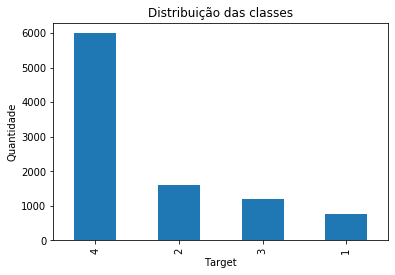

In [0]:
df["Target"].value_counts().plot.bar(title="Distribuição das classes")
plt.xlabel("Target")
plt.ylabel("Quantidade")

In [0]:
#Verificando valores nulos
df.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [0]:
#Verificando uma amostra dos dados
df.sample(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
589,ID_e5a7fd036,NaN,0,6,0,1,1,0,NaN,1,3,4,0,1,1,1,4,5,5,5,11,NaN,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,9.750000,0,0,0,0,1,0,0,0,0,4,1.250000,1,0,0,0,0,0,0,1,4,1,0,0,0,0,0,1,0,24,121,576,25,121,1,1.562500,0.062500,95.06250,576,4
8796,ID_d67ba3313,NaN,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,4,NaN,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,4.000000,0,1,0,0,0,0,0,0,0,1,1.000000,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,63,16,3969,1,16,0,1.000000,0.000000,16.00000,3969,4
7595,ID_8799edc18,80000.0,0,5,0,1,1,0,NaN,2,1,3,1,3,4,3,4,7,7,7,0,NaN,7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,6.000000,1,0,0,0,0,0,0,0,0,3,2.333333,0,1,0,0,0,0,1,1,3,0,0,0,1,0,0,0,1,6,0,36,49,36,9,5.444444,1.777778,36.00000,36,3
7292,ID_a9d94042c,NaN,0,7,0,1,1,1,1.0,1,1,2,0,1,1,1,2,3,3,3,8,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,6.500000,0,0,0,1,0,0,0,0,0,4,0.750000,1,0,0,0,0,0,1,1,3,0,0,0,1,0,0,1,0,61,64,3721,9,0,1,0.562500,0.250000,42.25000,3721,4
2842,ID_e8705c211,120000.0,0,4,0,1,1,0,NaN,1,1,2,1,3,4,2,4,6,6,6,1,0.0,6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,9.666667,0,1,0,0,0,0,0,0,0,2,3.000000,0,0,1,0,0,0,0,1,4,1,0,0,0,0,0,1,0,8,1,64,36,36,9,9.000000,1.000000,93.44445,64,4
3297,ID_78ce19e9e,NaN,0,5,0,1,1,0,NaN,0,1,1,0,1,1,0,2,2,2,2,9,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,12.500000,0,0,0,1,0,0,0,0,0,3,0.666667,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,58,81,3364,4,81,0,0.444444,0.000000,156.25000,3364,4
1097,ID_00da43675,160000.0,0,5,0,1,1,1,1.0,0,3,3,1,2,3,1,5,6,6,6,5,0.0,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,14.500000,0,1,0,0,0,0,0,0,0,3,2.000000,0,0,1,0,0,0,0,1,4,1,0,0,0,0,0,1,0,12,25,144,36,64,16,4.000000,4.000000,210.25000,144,2
4625,ID_d3ff5b93f,200000.0,0,4,0,1,1,0,NaN,0,1,1,0,1,1,0,2,2,2,2,15,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,14.000000,0,0,0,0,0,0,0,1,0,2,1.000000,0,0,1,0,0,1,0,1,2,1,0,0,0,0,0,1,0,42,225,1764,4,225,0,1.000000,0.000000,196.00000,1764,4
4408,ID_9321b0df7,250000.0,0,4,0,1,1,1,1.0,0,2,2,0,1,1,0,3,3,3,3,15,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,13.000000,0,0,0,0,0,0,0,1,0,2,1.500000,0,0,1,0,0,1,0,1,3,1,0,0,0,0,0,1,0,50,225,2500,9,225,1,2.250000,0.250000,169.00000,2500,4
2825,ID_8a23fd3c6,400000.0,0,4,0,1,1,0,NaN,0,0,0,0,2,2,0,2,2,2,2,6,NaN,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.000000,0,0,1,0,0,0,0,0,0,2,1.000000,0,1,0,0,0,0,0,1,2,1,0,0,0,0,0,1,0,68,36,4624,4,0,0,1.000000,1.000000,121.00000,4624,4


In [0]:
#Criando função para categoria
def categoria(s):
  if s == 1:
    return "Baixo"
  elif s == 2:
    return "Médio"
  elif s == 3:
    return "Alto"
  elif s == 4:
    return "Muito alto"

In [0]:
#Criando a coluna de categoria para substituir a coluna Target
df["Categoria"] = df["Target"].apply(categoria)

In [0]:
#Visualizando as 5 últimas linhas
df.tail()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Categoria
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,9,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,4,1.25,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,46,81,2116,25,81,1,1.5625,0.0625,68.0625,2116,2,Médio
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,0,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,4,1.25,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,2,0,4,25,81,1,1.5625,0.0625,68.0625,4,2,Médio
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,5,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,4,1.25,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,50,25,2500,25,81,1,1.5625,0.0625,68.0625,2500,2,Médio
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,11,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,4,1.25,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,26,121,676,25,81,1,1.5625,0.0625,68.0625,676,2,Médio
9556,ID_a38c64491,80000.0,0,6,0,1,1,0,NaN,0,2,2,1,2,3,1,4,5,5,5,8,NaN,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,4,1.25,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,21,64,441,25,81,1,1.5625,0.0625,68.0625,441,2,Médio


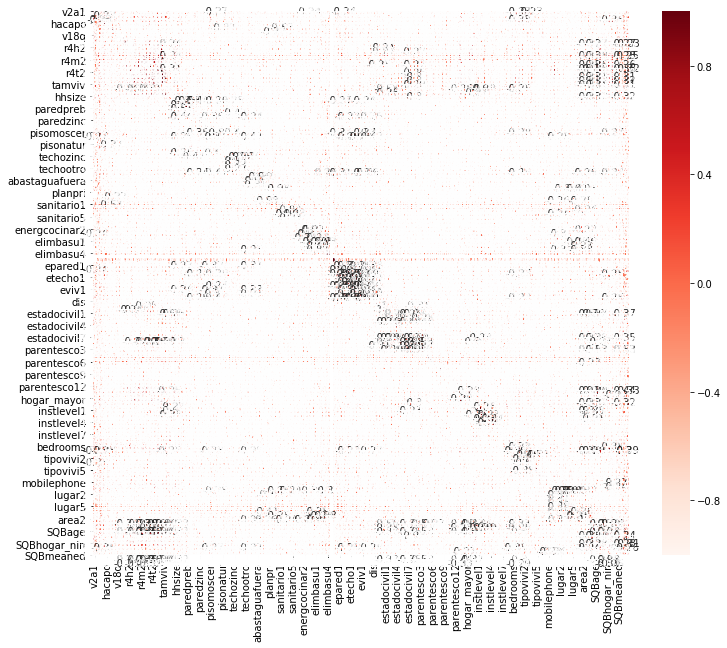

In [0]:
#Usando a correlação de Pearson
plt.figure (figsize = (12,10)) 
cor = df.corr () 
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds) 
plt.show ()

In [0]:
#Visualizando correlação
df.corr()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
v2a1,1.000000,-0.091732,0.443461,-0.073509,0.033551,0.088970,0.278364,0.302292,-0.081900,-0.002401,-0.059548,-0.072791,0.048169,-0.007806,-0.103959,0.032631,-0.043574,-0.064566,-0.051396,0.288006,-0.086238,-0.064566,0.290062,-0.101152,-0.174037,-0.037311,-0.134678,-0.053664,-0.025562,-0.015824,0.296623,-0.273600,NaN,NaN,-0.031581,-0.085837,-0.001022,0.011072,-0.029893,NaN,...,0.426544,-0.052032,-0.105092,-0.106630,-0.098785,-0.027489,-0.001094,0.023615,0.289269,0.227575,0.297657,-0.233023,NaN,0.226177,-0.226177,NaN,NaN,0.272942,0.041303,0.065360,0.108504,0.231539,-0.019377,-0.039030,-0.121150,-0.128111,-0.143357,0.112759,-0.112759,0.078897,0.358305,0.062343,-0.061309,0.364290,-0.082246,-0.191915,-0.061352,0.402561,0.062343,0.273559
hacdor,-0.091732,1.000000,-0.233369,0.652594,-0.175011,-0.101965,-0.084680,-0.049262,0.232508,0.059313,0.184857,0.268978,0.142458,0.264620,0.328901,0.134909,0.304282,0.304884,0.350948,-0.122134,0.047466,0.304884,-0.136055,0.074927,-0.027202,0.147449,0.083620,0.155120,-0.007622,-0.007622,-0.168472,0.077334,-0.006109,0.078103,0.232319,0.055087,-0.042053,-0.026698,-0.011166,-0.009338,...,-0.108783,0.084845,0.043483,0.001882,-0.003503,-0.043254,-0.018611,-0.007391,-0.070758,-0.024871,-0.209735,0.670727,-0.063173,-0.066533,0.073560,0.151115,0.010075,-0.067109,-0.075837,-0.059923,0.004046,-0.042086,0.017444,0.025546,-0.010172,0.037182,0.005289,0.027721,-0.027721,-0.118168,-0.109862,-0.102725,0.350546,-0.082229,0.388043,0.794699,0.005278,-0.099153,-0.102725,-0.191714
rooms,0.443461,-0.233369,1.000000,-0.213368,0.129183,0.130531,0.254256,0.208919,-0.066578,0.267627,0.195222,-0.032558,0.241989,0.168503,-0.064789,0.349206,0.245784,0.240137,0.254473,0.220284,-0.084857,0.240137,0.260981,-0.057740,-0.151392,-0.096855,-0.111619,-0.070527,-0.002567,-0.021199,0.266992,-0.203644,0.003253,-0.040900,-0.142969,-0.076674,0.044452,-0.033245,0.002973,0.066864,...,0.284654,-0.083246,-0.102221,-0.050018,-0.007555,0.050232,0.007313,-0.001366,0.178667,0.092962,0.804070,-0.382364,0.170745,0.093062,-0.171118,-0.103335,-0.114921,0.243198,0.226308,0.075540,0.404278,0.223771,-0.073862,-0.130994,-0.051941,-0.099481,-0.050428,0.130286,-0.130286,0.077046,0.233679,0.068288,0.221595,0.198890,0.007952,-0.355526,-0.027575,0.250061,0.068288,0.226208
hacapo,-0.073509,0.652594,-0.213368,1.000000,-0.150986,-0.124506,-0.067529,-0.037414,0.226378,0.126645,0.240056,0.241452,0.095545,0.212527,0.306722,0.152968,0.305857,0.306289,0.354389,-0.104846,0.081574,0.306289,-0.126550,0.057683,-0.036119,0.164714,0.083705,0.169976,-0.005961,-0.005961,-0.166538,0.073848,-0.004778,-0.005037,0.256174,0.055785,-0.069665,-0.020881,-0.008733,-0.007303,...,-0.121145,0.079814,0.030126,0.008589,-0.008689,-0.040219,-0.015811,-0.008468,-0.058766,-0.019452,-0.126310,0.530401,-0.026624,-0.052036,0.035628,0.101824,0.006048,-0.052486,-0.064587,-0.024046,0.044267,-0.038896,0.023858,-0.005963,0.000737,0.023113,0.024699,0.008402,-0.008402,-0.087773,-0.092703,-0.075528,0.373720,-0.071170,0.367025,0.640096,0.014411,-0.103324,-0.075528,-0.138008
v14a,0.033551,-0.175011,0.129183,-0.150986,1.000000,0.143143,0.036396,0.011255,-0.054769,0.018133,-0.015552,-0.006370,0.038997,0.026510,-0.039803,0.038295,0.007615,0.007328,0.010613,0.036796,-0.022039,0.007328,0.058186,-0.000

In [0]:
#Verificando quantos valores nulos existem na coluna v18q1(Número de tablets que a familia possui)
df["v18q1"].isnull().sum()

7342

In [0]:
#Verificando quantos valores nulos existem na coluna v2a1(pagamento mensal de aluguel)
df["v2a1"].isnull().sum()

6860

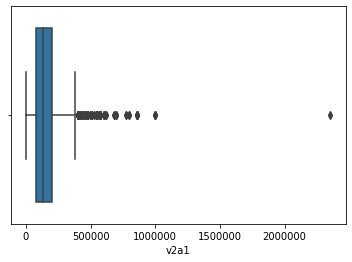

In [0]:
#Boxplot da coluna v2a1
ax = sns.boxplot(x=df1["v2a1"])

In [0]:
#Verificando quantos valores nulos existem na coluna rez_esc(Anos atrás na escola)
df["rez_esc"].isnull().sum()

7928

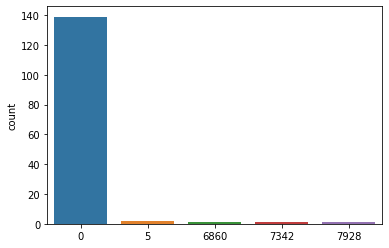

In [0]:
#Identificando os valores nulos
sns.countplot(df.isnull().sum(), data=df)

In [0]:
#Fazendo uma cópia do dataset
df1 = df.copy()

In [0]:
df2 = df.copy()

####**Tratamento e pré - processamento dos dados**

In [0]:
# Nas colunas abaixo existem algumas linhas com valores yes e no, como precisaremos trabalhar apenas com valores númericos, no prórpio kaggle 
#onde tem a descrição de cada variável recomenda-se que onde for yes substituir por 1 e onde for no substituir por 0. 
mapping = {"yes": 1, "no": 0}

# Preenchendo os valores com o mapeamento correto
df2['dependency'] = df2['dependency'].replace(mapping).astype(np.float64)
df2['edjefa'] = df2['edjefa'].replace(mapping).astype(np.float64)
df2['edjefe'] = df2['edjefe'].replace(mapping).astype(np.float64)

df2[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


In [0]:
#Tratando valores miising
#A coluna v18q1 é referente ao número de tablets que a família possui, ela estava preenchida com valores de 1 a 6, então onde estava em branco 
#substituímos por zero
df2['v18q1'] = df2['v18q1'].fillna(0)

A coluna tipovivi1 diz respeito se a família tem casa própria e totalmente paga, sendo assim, pegamos todo mundo que tem casa prórpia e paga e que estavam com valores em branco na coluna v2a1 que diz respeito ao pagamento mensal de aluguel e substituimos por 0

In [0]:
#Preenchendo os domicílios proprietários da casa com o pagamento do aluguel 0
df2.loc[(df2['tipovivi1'] == 1), 'v2a1'] = 0

A coluna rez_esc é referente aos anos de escola, então, pegamos todo mundo com mais de 19 anos e todo mundo com menos de 7 anos e substituímos os valores nulos por 0

In [0]:
df2.loc[((df2['age'] > 19) | (df2['age'] < 7)) & (df2['rez_esc'].isnull()), 'rez_esc'] = 0

In [0]:
#df2.loc[df2['rez_esc'] > 5, 'rez_esc'] = 5

In [0]:
#Diferença entre as pessoas que moram na casa e o tamanho da casa
#tamvivi é o número de pessoas que vivem na casa e hhsize é o tamanho da família
df2['hhsize-diff'] = df2['tamviv'] - df2['hhsize']

Temos algumas colunas referentes a eleltricidade, são elas: noelec: 1 sem eletricidade na habitação, coopele: 1 eletricidade da cooperativa, public:1 eletricidade da CNFL, ICE, ESPH / JASEC e planpri: 1 eletricidade de usina privada. Sendo assim, iteramos linha a linha para saber quem tinha ou não eletricidade e criamos uma nova coluna, em seguida excluímos as colunas citadas acima e ficamos apenas com a coluna criada.

In [0]:
elec = []

# Atribuindo valores
for i, row in df2.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)

In [0]:
# Gravando a nova variável e o sinalizador ausente
df2['elec'] = elec
df2['elec-missing'] = df2['elec'].isnull()

In [0]:
# Remove as colunas de eletricidade
df2 = df2.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

Também temos algumas colunas referente as paredes da casa, são elas: epared1: 1 se as paredes são ruins, epared2: 1 se as paredes são regulares, epared3: 1 se as paredes forem boas. a partir disso criamos uma nova coluna considerando se a parede da casa é boa, regular ou ruim, em seguida excluímos as 3 colunas de paredes e ficou apenas a nova coluna que foi criada.

In [0]:
# Variável ordinal de parede
df2['walls'] = np.argmax(np.array(df2[['epared1', 'epared2', 'epared3']]),
                           axis = 1)

In [0]:
df2["walls"].head(10)

0    1
1    1
2    1
3    2
4    2
5    2
6    2
7    0
8    0
9    0
Name: walls, dtype: int64

In [0]:
df2 = df2.drop(columns = ['epared1', 'epared2', 'epared3'])

O mesmo procedimento que foi realizado para as paredes também foi feito com relação ao telhado e o piso da casa, temos as seguintes colunas: etecho1: 1 se o telhado estiver ruim, etecho2: etecho2, =1 if roof are regular e etecho3: 1 se o telhado estiver bom, eviv1: 1 se o piso estiver ruim, eviv2: 1 se o piso for regular, eviv3: 1 se o piso for bom. Sendo assim aplicamos o mesmo procedimento anterior, criando uma nova coluna e excluíndo as 3 existentes.

In [0]:
# Variável ordinal de telhado
df2['roof'] = np.argmax(np.array(df2[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)

In [0]:
df2 = df2.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

In [0]:
# Variável ordinal de piso
df2['floor'] = np.argmax(np.array(df2[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)

In [0]:
df2 = df2.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

In [0]:
df2.shape

(9557, 136)

In [0]:
list(df2.columns)

['Id',
 'v2a1',
 'hacdor',
 'rooms',
 'hacapo',
 'v14a',
 'refrig',
 'v18q',
 'v18q1',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'rez_esc',
 'hhsize',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisocemento',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'dis',
 'male',
 'female',
 'estadocivil1',
 'estadocivil2',
 'estadocivil3',
 'estadocivil4',
 'estadocivil5',
 'estadocivil6',
 'estadocivil7',
 'parentesco1',
 'parentesco2',
 'parentesco3',
 'parentesc

In [0]:
df2.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Categoria,v2a1-missing,rez_esc-missing,hhsize-diff,elec,elec-missing,walls,roof,floor
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4,Muito alto,False,False,0,2.0,False,1,0,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4,Muito alto,False,False,0,2.0,False,1,1,1
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4,Muito alto,False,False,0,2.0,False,1,2,2
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4,Muito alto,False,False,0,2.0,False,2,2,2
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4,Muito alto,False,False,0,2.0,False,2,2,2


In [0]:
#Excluíndo as colunas de ID e a coluna Target
df2 = df2.drop(columns= ["Target", "Id", "idhogar"])

In [0]:
# Excluíndo todas as colunas de variáveis ao quadrado, porque já temos as colunas originais
df2 = df2[[x for x in df2 if not x.startswith('SQB')]]
df2 = df2.drop(columns = ['agesq'])
df2.shape

(9557, 124)

In [0]:
#Criando uma feature a partir das colunas `instlevel` que são 9 colunas referentes ao nível de educação
df2['inst'] = np.argmax(np.array(df2[[c for c in df2 if c.startswith('instl')]]), axis = 1)

In [0]:
#Apagando todas as colunas de instlevel já que agora temos a nossa nova coluna
df2 = df2.drop(columns = [c for c in df2 if c.startswith('instlevel')])

In [0]:
# Criando matriz de correlação
corr_matrix = df2.corr()

In [0]:
# Selecionando o triângulo superior da matriz de correlação
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [0]:
# Encontrando o índice de colunas de recursos com correlação maior do que 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.975)]

In [0]:
#Selecionando as colunas de recursos com correlação maior do que 0.95
print(f'existem {len(to_drop)} colunas correlacionadas para remover.')
print(to_drop)

existem 5 colunas correlacionadas para remover.
['tamhog', 'hhsize', 'female', 'hogar_total', 'area2']


In [0]:
#Apagando as colunas com correlação maior do que 0.95
df2 = df2.drop(columns = to_drop)

In [0]:
#Verificando se ainda temos valores nulos
df2.isnull().sum()

v2a1            949
hacdor            0
rooms             0
hacapo            0
v14a              0
               ... 
elec-missing      0
walls             0
roof              0
floor             0
inst              0
Length: 112, dtype: int64

In [0]:
#Apagando as linhas com valores nulos
df2.dropna(inplace=True)

In [0]:
#Verificando as linhas e colunas após o tratamento
df2.shape

(8279, 111)

###**Criação do modelo de aprendizagem de máquina**

In [0]:
#dividindo o dataset em treino e teste
X_train, X_test, Y_train, Y_teste = train_test_split(df2.drop("Categoria", axis=1), df2["Categoria"], test_size=0.3)

In [0]:
#Verificando as formas dos dados
X_train.shape,X_test.shape

((5795, 110), (2484, 110))

In [0]:
Y_train.shape,Y_teste.shape

((5795,), (2484,))

In [0]:
# Instanciando o objeto classificador, escolhemos o classificador Random Forest
random_clf = RandomForestClassifier()

In [0]:
#Treinando o modelo
random_clf.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Resultado do modelo
resultado = random_clf.predict(X_test)

In [0]:
resultado

array(['Muito alto', 'Muito alto', 'Muito alto', ..., 'Médio', 'Alto',
       'Muito alto'], dtype=object)

In [0]:
#Métricas de classificação
print(metrics.classification_report(Y_teste,resultado))

              precision    recall  f1-score   support

        Alto       0.84      0.72      0.78       294
       Baixo       0.91      0.73      0.81       181
  Muito alto       0.91      0.98      0.94      1638
       Médio       0.87      0.78      0.83       371

    accuracy                           0.90      2484
   macro avg       0.88      0.80      0.84      2484
weighted avg       0.90      0.90      0.90      2484



In [0]:
#Verificando as features mais importantes para o modelo treinado
random_clf.feature_importances_

array([1.86911622e-02, 2.99489213e-03, 2.38018041e-02, 1.82158970e-03,
       7.62111621e-04, 3.91664103e-03, 9.90661242e-03, 7.74767112e-03,
       1.49520921e-02, 1.80475499e-02, 1.87776145e-02, 1.46887394e-02,
       1.67926426e-02, 2.04465689e-02, 1.84321820e-02, 2.34279547e-02,
       1.99852460e-02, 1.77147180e-02, 2.00515266e-02, 2.75862050e-03,
       1.28256040e-02, 5.37453234e-03, 8.60574650e-03, 8.46755050e-04,
       8.57679275e-03, 5.59892279e-04, 7.35120978e-05, 2.54829829e-04,
       1.07218724e-02, 8.19021648e-03, 0.00000000e+00, 0.00000000e+00,
       1.33399206e-03, 4.58087343e-03, 9.28493019e-04, 1.27096939e-03,
       6.76539531e-04, 0.00000000e+00, 1.70803582e-02, 2.70134231e-03,
       2.92101719e-03, 1.43646913e-04, 9.52547831e-05, 6.94591996e-03,
       8.20419003e-03, 1.09534122e-03, 0.00000000e+00, 1.75998060e-04,
       1.05652084e-02, 9.11913550e-03, 7.15609288e-03, 6.10557550e-03,
       2.52256571e-03, 5.34123951e-03, 0.00000000e+00, 0.00000000e+00,
      

In [0]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [0]:
feature_imp

meaneduc        0.078167
dependency      0.041473
hogar_nin       0.041119
overcrowding    0.033605
qmobilephone    0.031937
                  ...   
pisoother       0.000000
elimbasu4       0.000000
elec-missing    0.000000
elimbasu6       0.000000
elimbasu5       0.000000
Length: 111, dtype: float64

In [0]:
#Features mais importantes de forma gráfica
def visualiza_features_importantes(features_lista):
  
  
  plt.figure(figsize=(16,8))
  sns.barplot(x=features_lista, y=features_lista.index)

  plt.xlabel("Feature importance score")
  plt.ylabel("Features")
  plt.title("Visualizando as features importantes")
  plt.yticks(np.arange(10))
  #plt.tick_params(axis="y", rotation=45)
  plt.show()

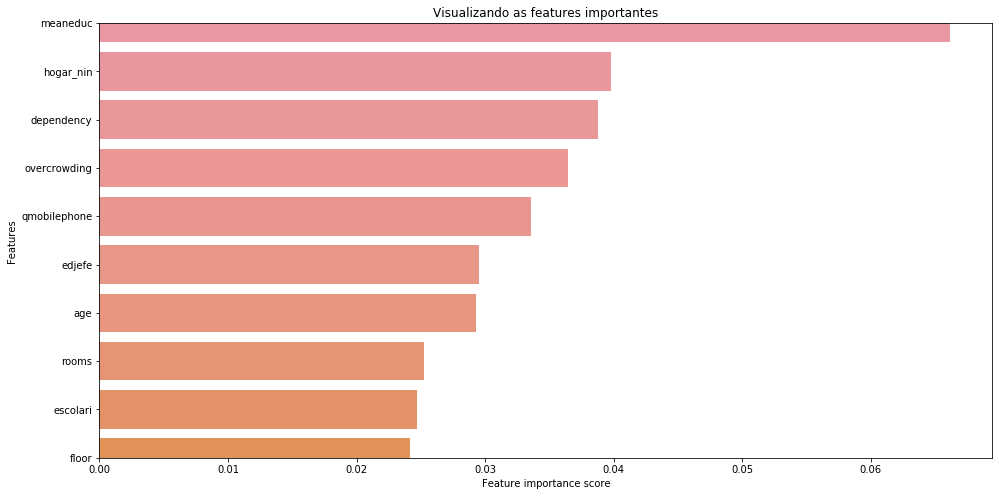

In [0]:
visualiza_features_importantes(feature_imp)

In [0]:
#Selecionando apenas as features com importância acima de um determinado score
features_selecionadas = []
for feature, importancia in feature_imp.iteritems():
  if importancia > 0.02:
    print(" {} : \t{}".format(feature, importancia))
    features_selecionadas.append(feature)

 meaneduc : 	0.06614530524269972
 hogar_nin : 	0.03982912226706947
 dependency : 	0.038753144792280106
 overcrowding : 	0.03645598034118113
 qmobilephone : 	0.033596497071136454
 edjefe : 	0.02950575897203266
 age : 	0.029276243345820067
 rooms : 	0.025226408093098014
 escolari : 	0.024678555987439583
 floor : 	0.024160022382430577
 roof : 	0.022224920335467368
 edjefa : 	0.021870807720713977
 tamviv : 	0.021234376495020295
 r4m3 : 	0.021030510566614764
 r4h2 : 	0.02047551542966335


In [0]:
#Selecionando uma árvore da floresta
tree0 = random_clf.estimators_[0]

In [0]:
tree0

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=808222404, splitter='best')

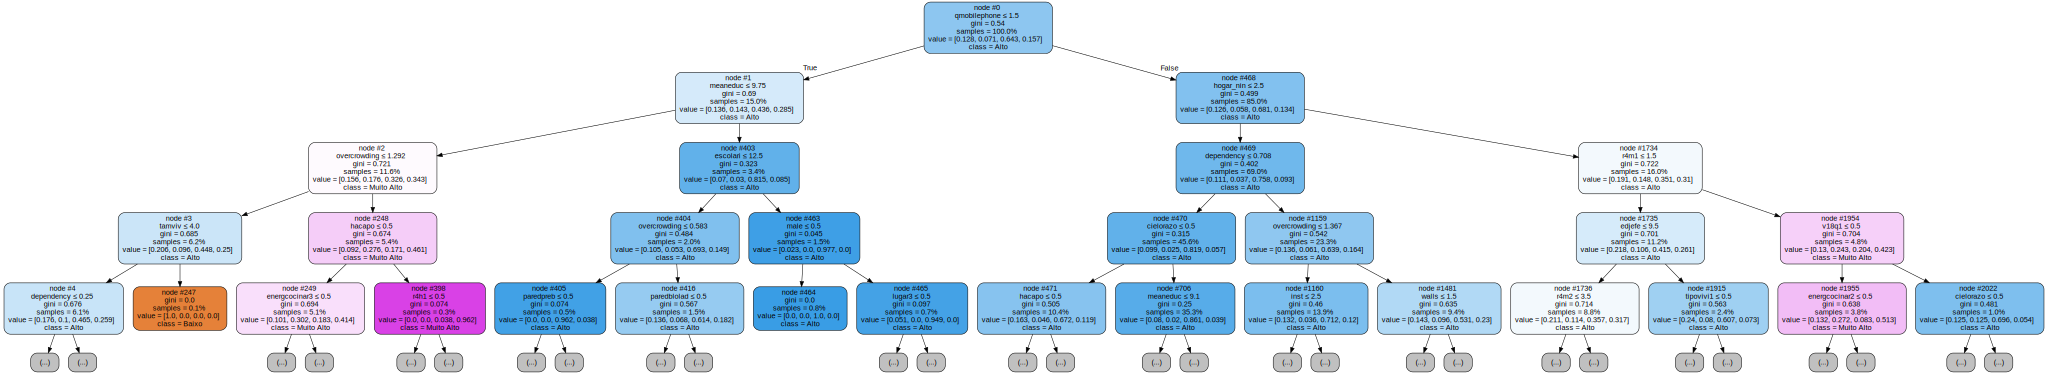

In [0]:
import graphviz
dot_data = export_graphviz(
    tree0,
    max_depth=4,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["Baixo", "Médio", "Alto", "Muito Alto"],
    filled=True, rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label="all",
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

Agora, vamos importar o conjunto de teste, realizar todo tratamento que foi feito anteriormento e realizar uma predição com basse nesse conjunto de teste.

In [0]:
from google.colab import files
arq = files.upload()

Saving test.csv to test.csv


In [0]:
arq_teste = pd.read_csv("test.csv")

In [0]:
arq_teste.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [0]:
arq_teste.isnull().sum()

Id                     0
v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
                   ...  
SQBhogar_nin           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
agesq                  0
Length: 142, dtype: int64

In [0]:
mapping = {"yes": 1, "no": 0}

# Preenchendo os valores com o mapeamento correto
arq_teste['dependency'] = arq_teste['dependency'].replace(mapping).astype(np.float64)
arq_teste['edjefa'] = arq_teste['edjefa'].replace(mapping).astype(np.float64)
arq_teste['edjefe'] = arq_teste['edjefe'].replace(mapping).astype(np.float64)

arq_teste[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,23856.000000,23856.000000,23856.000000
mean,1.181327,2.800176,5.199824
std,1.666209,4.603592,5.200980
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


In [0]:
#Tratando valores miising
arq_teste['v18q1'] = arq_teste['v18q1'].fillna(0)

In [0]:
#Preenchendo os domicílios proprietários da casa com o pagamento do aluguel 0
arq_teste.loc[(arq_teste['tipovivi1'] == 1), 'v2a1'] = 0

In [0]:
arq_teste.loc[((arq_teste['age'] > 19) | (arq_teste['age'] < 7)) & (arq_teste['rez_esc'].isnull()), 'rez_esc'] = 0

In [0]:
#arq_teste.loc[arq_teste['rez_esc'] > 5, 'rez_esc'] = 5

In [0]:
#Diferença entre as pessoas que moram na casa e o tamanho da casa
arq_teste['hhsize-diff'] = arq_teste['tamviv'] - arq_teste['hhsize']

In [0]:
elec1 = []

# Atribuindo valores
for i, row in arq_teste.iterrows():
    if row['noelec'] == 1:
        elec1.append(0)
    elif row['coopele'] == 1:
        elec1.append(1)
    elif row['public'] == 1:
        elec1.append(2)
    elif row['planpri'] == 1:
        elec1.append(3)
    else:
        elec1.append(np.nan)

In [0]:
# Gravando a nova variável e o sinalizador ausente
arq_teste['elec'] = elec1

In [0]:
# Remove as colunas de eletricidade
arq_teste = arq_teste.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

In [0]:
# Variável ordinal de parede
arq_teste['walls'] = np.argmax(np.array(arq_teste[['epared1', 'epared2', 'epared3']]),
                           axis = 1)

In [0]:
arq_teste = arq_teste.drop(columns = ['epared1', 'epared2', 'epared3'])

In [0]:
# Variável ordinal de telhado
arq_teste['roof'] = np.argmax(np.array(arq_teste[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)

In [0]:
arq_teste = arq_teste.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

In [0]:
# Variável ordinal de piso
arq_teste['floor'] = np.argmax(np.array(arq_teste[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)

In [0]:
arq_teste = arq_teste.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

In [0]:
arq_teste = arq_teste.drop(columns=["Id", "idhogar"])

In [0]:
arq_teste = arq_teste[[x for x in arq_teste if not x.startswith('SQB')]]
arq_teste = arq_teste.drop(columns = ['agesq'])
arq_teste.shape

(23856, 123)

In [0]:
#Criando um recurso a partir das colunas `instlevel`
arq_teste['inst'] = np.argmax(np.array(arq_teste[[c for c in arq_teste if c.startswith('instl')]]), axis = 1)

In [0]:
arq_teste = arq_teste.drop(columns = [c for c in arq_teste if c.startswith('instlevel')])

In [0]:
# Criando matriz de correlação
corr_matrix1 = arq_teste.corr()

In [0]:
# Selecionando o triângulo superior da matriz de correlação
upper1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))

In [0]:
# Encontrando o índice de colunas de recursos com correlação maior do que 0.95
to_drop1 = [column for column in upper1.columns if any(abs(upper[column]) > 0.975)]

In [0]:
print(f'existem {len(to_drop1)} colunas correlacionadas para remover.')
print(to_drop1)

existem 5 colunas correlacionadas para remover.
['tamhog', 'hhsize', 'female', 'hogar_total', 'area2']


In [0]:
arq_teste = arq_teste.drop(columns = to_drop1)

In [0]:
arq_teste.dropna(inplace=True)

###**Realizando a predição no arquivo de teste**

In [0]:
resultado_teste = random_clf.predict(arq_teste)

In [0]:
resultado_teste

array(['Muito alto', 'Muito alto', 'Muito alto', ..., 'Muito alto',
       'Alto', 'Muito alto'], dtype=object)

In [0]:
#Métricas de classificação
#print(metrics.classification_report(resultado_teste))

In [0]:
teste3 = pd.Series(data=resultado_teste)

In [0]:
teste3.sample(50)

20289    Muito alto
10941    Muito alto
6120     Muito alto
1330          Médio
15794    Muito alto
280      Muito alto
6610     Muito alto
10640    Muito alto
18111         Baixo
19245    Muito alto
6841     Muito alto
5325          Médio
4665     Muito alto
1262     Muito alto
6277     Muito alto
4926     Muito alto
1632     Muito alto
14895    Muito alto
14905         Baixo
16610    Muito alto
1068     Muito alto
11369         Baixo
17300    Muito alto
4587     Muito alto
18421    Muito alto
15508    Muito alto
3354     Muito alto
2803     Muito alto
5077     Muito alto
1526     Muito alto
13929    Muito alto
13161    Muito alto
20038         Médio
4179     Muito alto
3767     Muito alto
12836    Muito alto
9832     Muito alto
8934     Muito alto
15351    Muito alto
7879           Alto
18928          Alto
12123          Alto
4051     Muito alto
13360    Muito alto
4013     Muito alto
4667     Muito alto
19054    Muito alto
11862    Muito alto
9013     Muito alto
6948     Muito alto
